In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\dell\Downloads\marksheet.csv")
df

,id,Name,Gender,Age,Section,Science,English,History,Maths
0,1,Bronnie,Female,13,C,21,81,62,49
1,2,Lemmie,Male,15,B,29,41,17,40
2,3,Danya,Female,14,C,12,87,16,96
3,4,Denna,Female,14,B,15,53,82,33
4,5,Jocelin,Male,14,A,43,6,3,21
...,...,...,...,...,...,...,...,...,...
245,246,Nickie,Male,13,C,28,15,25,10
246,247,Rog,Female,13,B,1,4,68,65
247,248,Kaia,Male,15,B,93,48,82,44
248,249,Anni,Female,14,B,35,73,66,59


In [3]:
df.head(4)

,id,Name,Gender,Age,Section,Science,English,History,Maths
0,1,Bronnie,Female,13,C,21,81,62,49
1,2,Lemmie,Male,15,B,29,41,17,40
2,3,Danya,Female,14,C,12,87,16,96
3,4,Denna,Female,14,B,15,53,82,33


In [4]:
df['Total'] = df['Science']+df['English']+df['History']+df['Maths']

In [7]:
df.head(3)


,id,Name,Gender,Age,Section,Science,English,History,Maths,Total,Percentage
0,1,Bronnie,Female,13,C,21,81,62,49,213,53.25
1,2,Lemmie,Male,15,B,29,41,17,40,127,31.75
2,3,Danya,Female,14,C,12,87,16,96,211,52.75


In [8]:
df['Percentage'] = df['Total']/4

In [9]:
df.head(3)

,id,Name,Gender,Age,Section,Science,English,History,Maths,Total,Percentage
0,1,Bronnie,Female,13,C,21,81,62,49,213,53.25
1,2,Lemmie,Male,15,B,29,41,17,40,127,31.75
2,3,Danya,Female,14,C,12,87,16,96,211,52.75


In [10]:
def passfail(val):
    if(val>33):
        return "pass"
    else:
        return "Fail"
        

In [12]:
df['pass/Fail'] = df['Percentage'].map(passfail)

In [13]:
df.head(4)


,id,Name,Gender,Age,Section,Science,English,History,Maths,Total,Percentage,pass/Fail
0,1,Bronnie,Female,13,C,21,81,62,49,213,53.25,pass
1,2,Lemmie,Male,15,B,29,41,17,40,127,31.75,Fail
2,3,Danya,Female,14,C,12,87,16,96,211,52.75,pass
3,4,Denna,Female,14,B,15,53,82,33,183,45.75,pass


In [14]:
df = df.drop(columns=['id','Name','Gender','Age','Section'])

In [16]:
df.head(4)

,Science,English,History,Maths,Total,Percentage,pass/Fail
0,21,81,62,49,213,53.25,pass
1,29,41,17,40,127,31.75,Fail
2,12,87,16,96,211,52.75,pass
3,15,53,82,33,183,45.75,pass


In [22]:
from sklearn.preprocessing import OrdinalEncoder

In [25]:
ode = OrdinalEncoder(categories = [['Fail','pass']])

In [26]:
df['pass/Fail'] = ode.fit_transform(df[['pass/Fail']])

In [27]:
df.head(4)

,Science,English,History,Maths,Total,Percentage,pass/Fail
0,21,81,62,49,213,53.25,1.0
1,29,41,17,40,127,31.75,0.0
2,12,87,16,96,211,52.75,1.0
3,15,53,82,33,183,45.75,1.0


In [29]:
import matplotlib.pyplot as plt

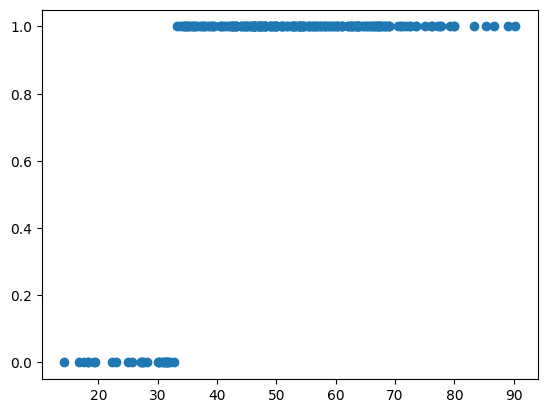

In [32]:
plt.scatter(df['Percentage'],df['pass/Fail'])
plt.show()

In [33]:
df.shape

(250, 7)

In [34]:
import seaborn as sns

<Axes: xlabel='pass/Fail', ylabel='count'>

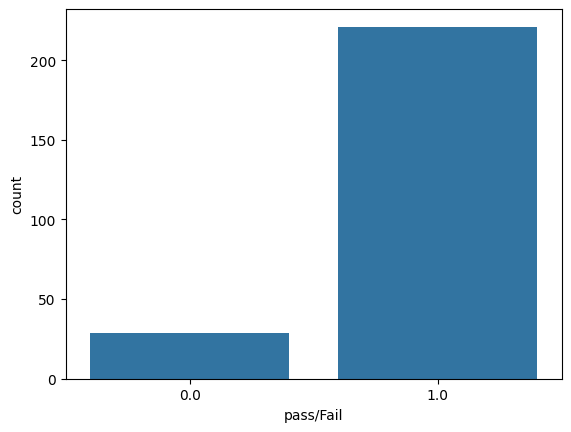

In [35]:
sns.countplot(x='pass/Fail',data = df)

In [36]:
from sklearn.linear_model import LogisticRegression

In [51]:
model = LogisticRegression()

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
df.head(4)

,Science,English,History,Maths,Total,Percentage,pass/Fail
0,21,81,62,49,213,53.25,1.0
1,29,41,17,40,127,31.75,0.0
2,12,87,16,96,211,52.75,1.0
3,15,53,82,33,183,45.75,1.0


In [54]:
X = df.iloc[:,0:6]

In [55]:
y = df.iloc[:,6]

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=11,test_size=0.2)

In [57]:
model.fit(X_train,y_train)

LogisticRegression()

In [58]:
model.score(X_test,y_test)

1.0

In [60]:
y_pred = model.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
cm = confusion_matrix(y_pred,y_test)

In [63]:
cm

array([[ 8,  0],
       [ 0, 42]])

In [74]:
from sklearn.naive_bayes import GaussianNB

In [75]:
gnb = GaussianNB()

In [76]:
gnb.fit(X_train,y_train)

GaussianNB()

In [77]:
gnb.score(X_test,y_test)

0.94

In [81]:
y_pred = gnb.predict(X_test)

In [82]:
cm = confusion_matrix(y_pred,y_test)

In [83]:
cm 

array([[ 7,  2],
       [ 1, 40]])